<a href="https://colab.research.google.com/github/ayanmmm/Assignment10/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

**Assignment 10**

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.


The original dataset is available at


(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,


please refer to the original link of the dataset in the UCI ML
repository.


But the shared drive folder have the dataset for your convenience


perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.


Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report

In [52]:
test=pd.read_csv("/content/testKNN.txt",header=None,sep=',',
                 names=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass'])

In [53]:
train=pd.read_csv('/content/trainKNN.txt',header=None,sep=',',
                  names=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass'])

In [54]:
train.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [55]:
train.dtypes

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [56]:
train['Type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [57]:
a=test.shape
print(a)

b=train.shape
print(b)

(18, 11)
(196, 11)


In [58]:
a=test.isnull().sum()
print(a)
print("-------------------")
b=train.isnull().sum()
print(b)

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64
-------------------
Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64


In [59]:
a=test.duplicated().sum()
print(a)

b=train.duplicated().sum()
print(b)

0
0


In [60]:
a=test.dtypes
print(a)

b=train.dtypes
print(b)

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object
Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object


In [61]:
train.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


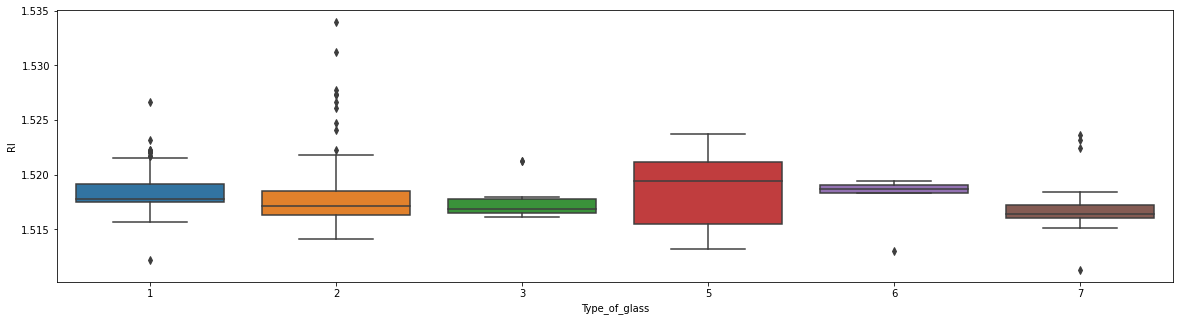

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Type_of_glass',y='RI',data=train)
plt.show()

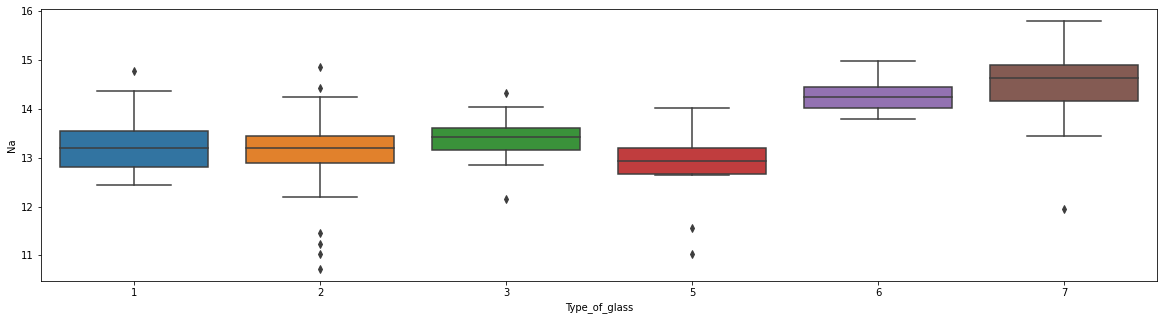

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Type_of_glass',y='Na',data=train)
plt.show()

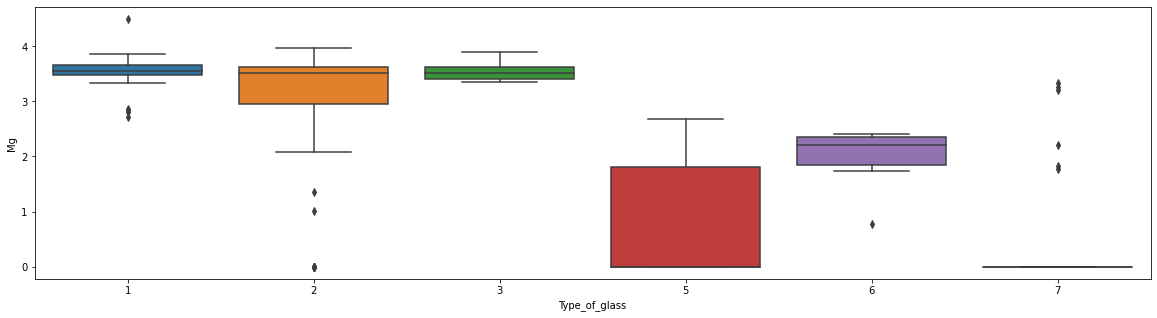

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Type_of_glass',y='Mg',data=train)
plt.show()

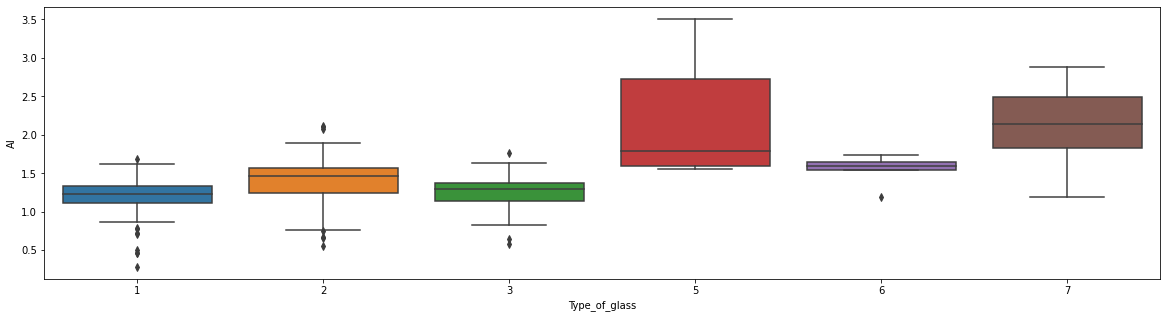

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Type_of_glass',y='Al',data=train)
plt.show()

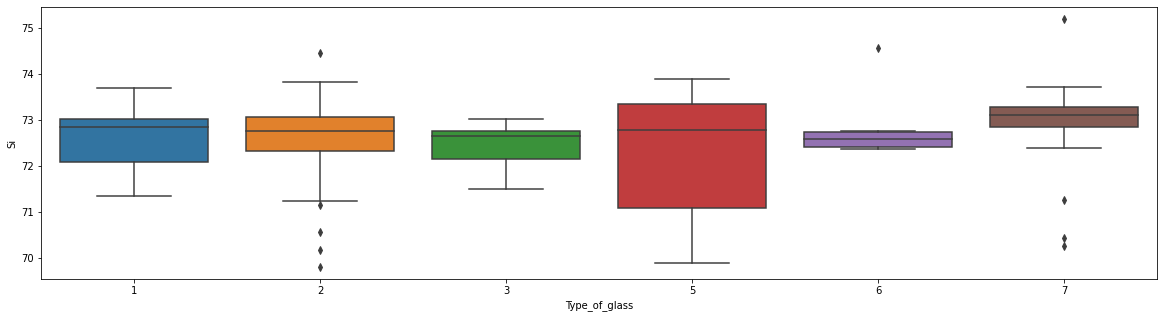

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Type_of_glass',y='Si',data=train)
plt.show()

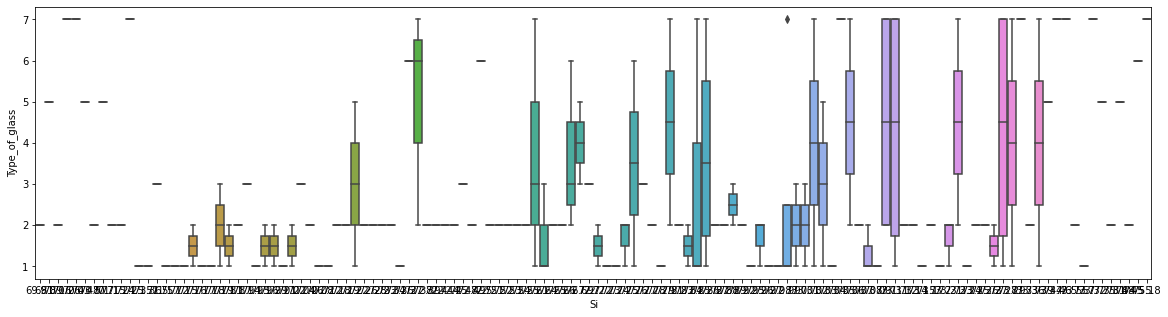

In [67]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Si',y='Type_of_glass',data=train)
plt.show()

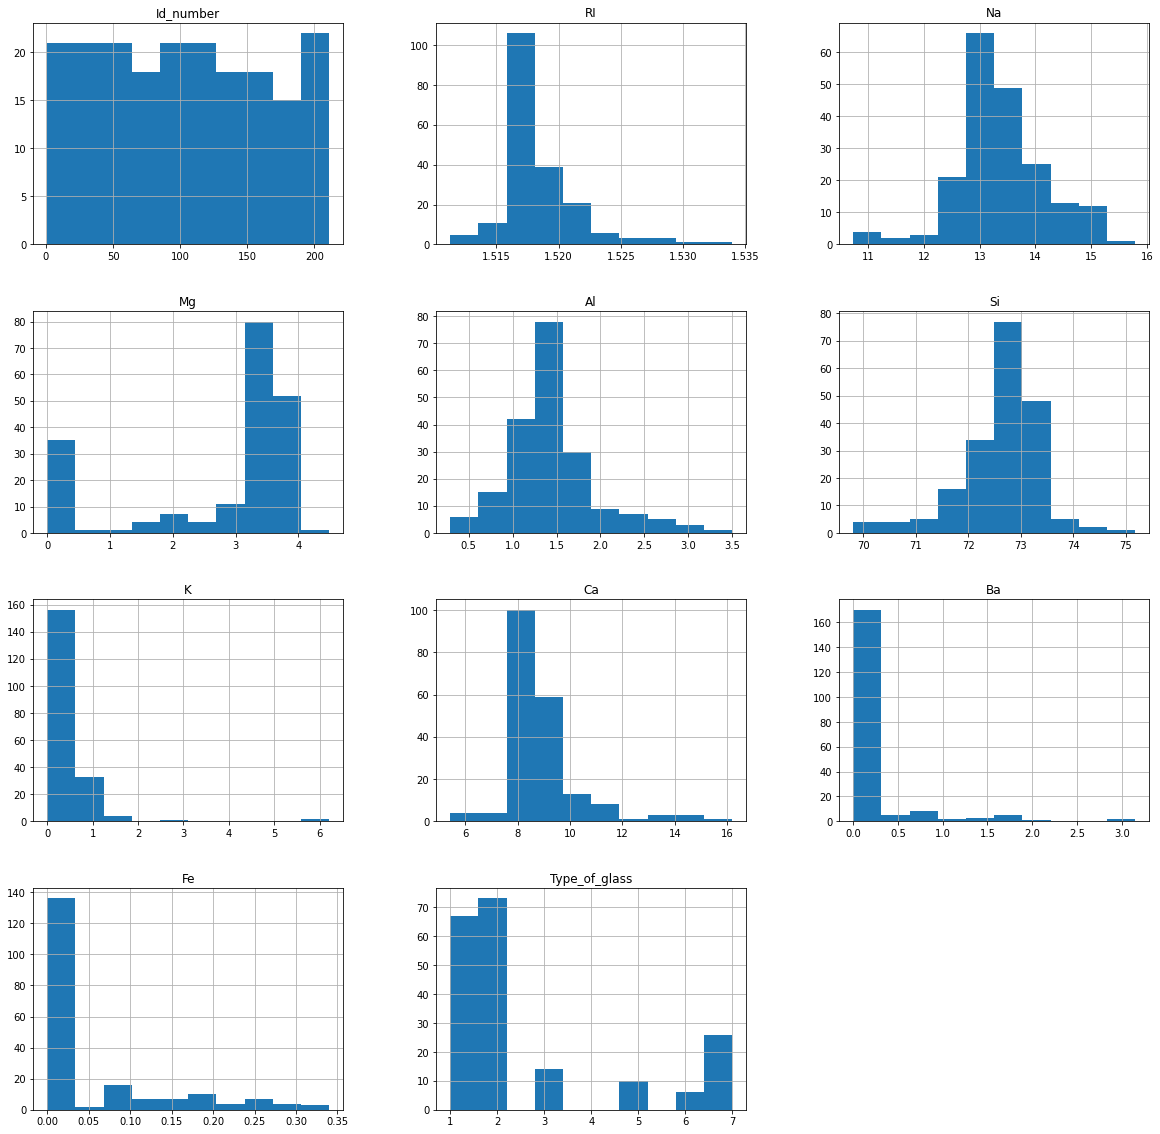

In [68]:
p = train.hist(figsize = (20,20))

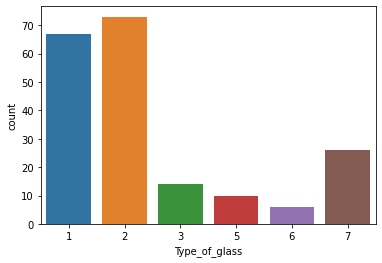

In [69]:
sns.countplot(train['Type_of_glass'])

In [70]:
def outlier_presence(train):
  for i in train.keys():
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_Limit=", lower_limit)
    print("Upper_Limit=", upper_limit)
    outliers = train[(train[i]<lower_limit)|(train[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(train)

Interquartile Range of Id_number is 103.5
Lower_Limit= -105.5
Upper_Limit= 308.5
Outlier is Not Presented In Id_number


Interquartile Range of RI is 0.002527500000000016
Lower_Limit= 1.51266625
Upper_Limit= 1.5227762500000002
Outlier is Presented In RI


Interquartile Range of Na is 0.9149999999999991
Lower_Limit= 11.505000000000003
Upper_Limit= 15.165
Outlier is Presented In Na


Interquartile Range of Mg is 1.2475
Lower_Limit= 0.49124999999999974
Upper_Limit= 5.48125
Outlier is Presented In Mg


Interquartile Range of Al is 0.4325000000000001
Lower_Limit= 0.5412499999999998
Upper_Limit= 2.27125
Outlier is Presented In Al


Interquartile Range of Si is 0.7625000000000028
Lower_Limit= 71.17374999999998
Upper_Limit= 74.22375
Outlier is Presented In Si


Interquartile Range of K is 0.47
Lower_Limit= -0.565
Upper_Limit= 1.315
Outlier is Presented In K


Interquartile Range of Ca is 0.8725000000000005
Lower_Limit= 6.91125
Upper_Limit= 10.401250000000001
Outlier is Presented In Ca


Interq

In [71]:
Lower_Limit= 1.51266625
Upper_Limit= 1.5227762500000002

In [72]:
train['RI'] = np.where(
    train['RI']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['RI']<Lower_Limit,
        Lower_Limit,
        train['RI']
    ) 
)
train['RI'].describe()

count    196.000000
mean       1.518046
std        0.002286
min        1.512666
25%        1.516458
50%        1.517630
75%        1.518985
max        1.522776
Name: RI, dtype: float64

In [73]:
Lower_Limit= 11.505000000000003
Upper_Limit= 15.165

In [74]:
train['Na'] = np.where(
    train['Na']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Na']<Lower_Limit,
        Lower_Limit,
        train['Na']
    ) 
)
train['Na'].describe()

count    196.000000
mean      13.382551
std        0.744532
min       11.505000
25%       12.877500
50%       13.280000
75%       13.792500
max       15.165000
Name: Na, dtype: float64

In [75]:
Lower_Limit= 0.49124999999999974
Upper_Limit= 5.48125

In [76]:
train['Mg'] = np.where(
    train['Mg']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Mg']<Lower_Limit,
        Lower_Limit,
        train['Mg']
    ) 
)
train['Mg'].describe()

count    196.000000
mean       2.846703
std        1.220038
min        0.491250
25%        2.362500
50%        3.480000
75%        3.610000
max        4.490000
Name: Mg, dtype: float64

In [77]:
Lower_Limit= 0.5412499999999998
Upper_Limit= 2.27125

In [78]:
train['Al'] = np.where(
    train['Al']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Al']<Lower_Limit,
        Lower_Limit,
        train['Al']
    ) 
)
train['Al'].describe()

count    196.000000
mean       1.426027
std        0.407419
min        0.541250
25%        1.190000
50%        1.360000
75%        1.622500
max        2.271250
Name: Al, dtype: float64

In [79]:
Lower_Limit= 71.17374999999998
Upper_Limit= 74.22375

In [80]:
train['Si'] = np.where(
    train['Si']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Si']<Lower_Limit,
        Lower_Limit,
        train['Si']
    ) 
)
train['Si'].describe()

count    196.000000
mean      72.664005
std        0.640031
min       71.173750
25%       72.317500
50%       72.810000
75%       73.080000
max       74.223750
Name: Si, dtype: float64

In [81]:
Lower_Limit= -0.565
Upper_Limit= 1.315

In [82]:
train['K'] = np.where(
    train['K']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['K']<Lower_Limit,
        Lower_Limit,
        train['K']
    ) 
)
train['K'].describe()

count    196.000000
mean       0.457015
std        0.302354
min        0.000000
25%        0.140000
50%        0.560000
75%        0.610000
max        1.315000
Name: K, dtype: float64

In [83]:
Lower_Limit= 6.91125
Upper_Limit= 10.401250000000001

In [84]:
train['Ca'] = np.where(
    train['Ca']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Ca']<Lower_Limit,
        Lower_Limit,
        train['Ca']
    ) 
)
train['Ca'].describe()

count    196.000000
mean       8.738967
std        0.811794
min        6.911250
25%        8.220000
50%        8.575000
75%        9.092500
max       10.401250
Name: Ca, dtype: float64

In [85]:
Lower_Limit= 0.0
Upper_Limit= 0.0

In [86]:
train['Ba'] = np.where(
    train['Ba']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Ba']<Lower_Limit,
        Lower_Limit,
        train['Ba']
    ) 
)
train['Ba'].describe()

count    196.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Ba, dtype: float64

In [87]:
Lower_Limit= -0.135
Upper_Limit= 0.225

In [88]:
train['Fe'] = np.where(
    train['Fe']>Upper_Limit,
    Upper_Limit,
    np.where(
        train['Fe']<Lower_Limit,
        Lower_Limit,
        train['Fe']
    ) 
)
train['Fe'].describe()

count    196.000000
mean       0.046786
std        0.077325
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.225000
Name: Fe, dtype: float64

In [89]:
train.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [90]:
train.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.0,196.000000,196.000000
mean,102.862245,1.518046,13.382551,2.846703,1.426027,72.664005,0.457015,8.738967,0.0,0.046786,2.668367
std,61.195663,0.002286,0.744532,1.220038,0.407419,0.640031,0.302354,0.811794,0.0,0.077325,2.062416
min,1.000000,1.512666,11.505000,0.491250,0.541250,71.173750,0.000000,6.911250,0.0,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.0,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.0,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.0,0.090000,3.000000
max,211.000000,1.522776,15.165000,4.490000,2.271250,74.223750,1.315000,10.401250,0.0,0.225000,7.000000


In [91]:
train.drop("Id_number", axis=1, inplace=True)

In [92]:
test.drop("Id_number", axis=1, inplace=True)

In [93]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49000,1.10000,71.78,0.060,8.75000,0.0,0.0,1
1,1.51761,13.89,3.60000,1.36000,72.73,0.480,7.83000,0.0,0.0,1
2,1.51618,13.53,3.55000,1.54000,72.99,0.390,7.78000,0.0,0.0,1
3,1.51766,13.21,3.69000,1.29000,72.61,0.570,8.22000,0.0,0.0,1
4,1.51742,13.27,3.62000,1.24000,73.08,0.550,8.07000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.49125,1.87000,73.11,0.000,8.67000,0.0,0.0,7
192,1.51831,14.39,0.49125,1.82000,72.86,1.315,6.91125,0.0,0.0,7
193,1.51640,14.37,0.49125,2.27125,72.85,0.000,9.45000,0.0,0.0,7
194,1.51623,14.14,0.49125,2.27125,72.61,0.080,9.18000,0.0,0.0,7


In [107]:
x=train[['RI','Na',	'Mg',	'Al',	'Si',	'K',	'Ca',	'Ba',	'Fe']].values
y=train[['Type_of_glass']].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.6440677966101694

In [106]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:

  knn = KNeighborsClassifier(i,metric='euclidean', p=2 ) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  1.0  cv score :  0.6983516483516483
K value  :  2  train score :  0.8540145985401459  cv score :  0.6615384615384616
K value  :  3  train score :  0.8686131386861314  cv score :  0.6780219780219781
K value  :  4  train score :  0.7956204379562044  cv score :  0.6697802197802198
K value  :  5  train score :  0.7883211678832117  cv score :  0.6324175824175825
K value  :  6  train score :  0.7445255474452555  cv score :  0.6318681318681318
K value  :  7  train score :  0.7518248175182481  cv score :  0.6109890109890109
K value  :  8  train score :  0.7226277372262774  cv score :  0.6406593406593407
K value  :  9  train score :  0.708029197080292  cv score :  0.6038461538461538
K value  :  10  train score :  0.708029197080292  cv score :  0.6043956043956044
K value  :  20  train score :  0.5985401459854015  cv score :  0.5895604395604396
K value  :  50  train score :  0.48905109489051096  cv score :  0.37142857142857144


In [48]:
#with euclidean mathod best value of K is 3

In [109]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:

  knn = KNeighborsClassifier(i,metric='manhattan', p=2 ) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  1.0  cv score :  0.692857142857143
K value  :  2  train score :  0.8467153284671532  cv score :  0.6648351648351648
K value  :  3  train score :  0.7956204379562044  cv score :  0.6945054945054945
K value  :  4  train score :  0.8321167883211679  cv score :  0.6873626373626374
K value  :  5  train score :  0.7883211678832117  cv score :  0.671978021978022
K value  :  6  train score :  0.781021897810219  cv score :  0.6494505494505494
K value  :  7  train score :  0.7226277372262774  cv score :  0.6274725274725274
K value  :  8  train score :  0.7591240875912408  cv score :  0.6489010989010989
K value  :  9  train score :  0.708029197080292  cv score :  0.6263736263736265
K value  :  10  train score :  0.7372262773722628  cv score :  0.6340659340659341
K value  :  20  train score :  0.6496350364963503  cv score :  0.6203296703296702
K value  :  50  train score :  0.48175182481751827  cv score :  0.4175824175824176


In [110]:
#with manhattan mathod best value of K is 3

In [120]:
x=test[['RI','Na',	'Mg',	'Al',	'Si',	'K',	'Ca',	'Ba',	'Fe']].values
y=test[['Type_of_glass']].values

In [121]:
# knn = KNeighborsClassifier(3)
# knn.fit(x,y)
# knn.score(x,y)

0.7777777777777778

In [103]:
#Accuracy is 77% in test data set.